In [1]:
import numpy as np
import pandas as pd

#### MNIST 데이터 준비

In [2]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, cache=True) 
mnist


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
X, y = mnist["data"], mnist["target"]
y = np.array(list(map(int, y)))


print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


3


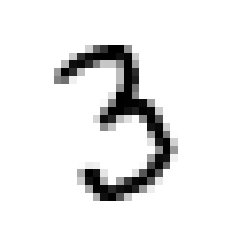

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

print(y[30000])

some_digit = X[30000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
#cmap=matplotlib.cm.binary ==> binary 컬러맵으로 그리기
#interpolation="nearest" ==> 각 픽셀은 nearest 보간 방식으로 사용해서 결정한다(nearest 보간 방식 : 새로운 지점 또는 한 지점 값을 결정할 때 주변 분포한 값을 사용해 결정하는 것)
plt.axis("off")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # 모든 교차 검증 폴드가 비슷해지도록 만들기 위해

#### 이진 분류기 훈련

In [6]:
y_train_3 =(y_train==3)
y_test_3 = (y_test==3)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
#max_iter=5 는 최대로 통과할 수 있는 데이터의 수가 5
sgd_clf.fit(X_train, y_train_3)

sgd_clf.predict([some_digit])

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([ True])

#### 성능 측정

1. 교차 검증

폴드가 3개인 K-겹 교차 검증 사용해 SGDClassifier 모델 평가해 보았는데, 모든 교차 검증 폴드에 대해 정확도가 95% 이상이다. 그러나 이는, 전체 이미지의 10%정도 숫자만 3이기 때문에 모든 숫자를 모두 3이 아니라고 예측해도 정확도가 90%이다.

이 데이터의 경우는, (특히 불균형한 데이터셋을 다룰 때) 이런 정확도는 분류기의 성능 측정 지표로 옳지 않다.

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9584 , 0.94465, 0.9566 ])

2. 오차 행렬





In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)
#cross_val_predict 는 K-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

# TN FP
# FN TP

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[53347,   522],
       [ 2285,  3846]], dtype=int64)

3. 정밀도와 재현율
- 정밀도(Precision) : 양성 예측의 정확도 ( TP / (TP+FP) )
- 재현율(Recall) : 민감도, 진짜 양성 비율(TPR) ( TP / (TP+FN) )
- F1 점수 : 정밀도와 재현율의 조화 평균 ( 2 / ( 1/정밀도 + 1/재현율 ) )

정밀도와 재현율이 비슷한 경우 F1 점수가 높은데, 이것이 항상 바람직하지는 않다. 경우에 따라 높은 정밀도를 선호하거나 높은 재현율을 선호하는 경우가 있음.

정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지 ==> 정밀도/재현율 트레이드오프

In [10]:
# 정밀도와 재현율, F1 점수
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_3, y_train_pred))
print(recall_score(y_train_3, y_train_pred))
print(f1_score(y_train_3, y_train_pred))

0.8804945054945055
0.6273038656010439
0.7326412039241833


4. 정밀도/재현율 트레이드오프
- SGDClassifier 분류기는 결정 함수를 사용하여 각 샘플의 점수를 계산한다. 이 점수가 결정 임계값보다 크면 양성, 작으면 음성으로 분류한다. 임계값을 높이면 정밀도가 높아지고 재현율이 낮아지며, 임계값을 낮추면 정밀도가 낮아지고 재현율이 높아진다.

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-p

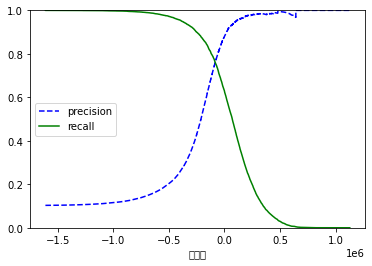

In [11]:
# 정밀도-재현율 트레이드오프
# 재현율에 대한 정밀도 곡선을 그려, 급격하게 줄어드는 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋음
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")
# method="decision_function" 는 예측 결과가 아니라, 결정 점수를 반환받도록

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.xlabel("임곗값")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

5. ROC 곡선
- 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR)
- 즉, 민감도(재현율)에 대한 1-특이도 그래프

AUC : ROC 곡선의 아래 면적 (클수록 좋음)

C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\prog

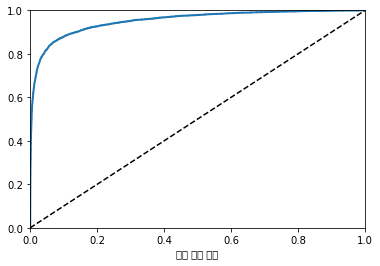

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.xlabel('진짜 양성 비율')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)

0.9523707086958411

In [14]:
# RandomForestClassifier 의 ROC 곡선과 ROC AUC 점수를 SGDClassifier과 비교
# RandomForestClassifier 에는 decision_function() 메서드는 없지만 predict_proba() 메서드 있다. 
# 이는 샘플이 주어진 클래스에 속할 확률을 담은 배열 반환
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method="predict_proba")

C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\prog

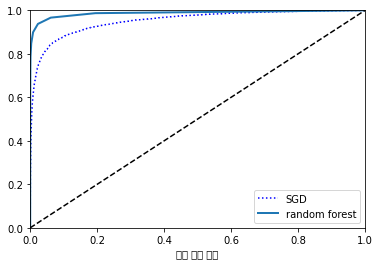

In [15]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc="lower right")
plt.show()

In [16]:
roc_auc_score(y_train_3, y_scores_forest)

0.9873304890838395

#### 다중 분류

다중 분류기(다항 분류기) : 둘 이상의 클래스를 구별할 수 있음
- 일대다 (OvA) 전략 : 1개의 분류기로, 분류기의 각 결정 점수 중에서 가장 높은 것을 클래스로 선택하는 방법
- 일대일 (OvO) 전략 : 각 클래스의 조합마다 이진 분류기 훈련. 총 N*(N-1)개의 분류기가 필요 // 각 분류기의 훈련에 전체 훈련세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것이 주요 장점이다.

> SVM 같은 일부 알고리즘은 OvO를 선호하나, 대부분의 이진 분류 알고리즘에서는 OvA를 선호

In [17]:
#OvA 방식
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([3])

In [18]:
# 각 클래스의 결정점수들. 가장 높은 점수는 클래스 3에 해당하는 값
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-304960.48960773, -221814.89448227, -358600.98835805,
         206233.56537193, -451000.29304455, -217497.67983248,
        -494261.21142334, -277595.81479854, -145139.69237693,
        -156588.93102859]])

In [19]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

3

In [20]:
# 사이킷런에서 OvO나 OvA를 사용하도록 강요하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
print(ovo_clf.estimators_)


C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to

[3]
(SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, random_state=42), SGDClassifier(max_iter=5, r

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [21]:
#랜덤포레스트 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvO나 OvA를 적용할 필요 없음.
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([some_digit]))

# predict_proba() 메서드 호출하면 분류기가 각 샘플에 부여한 클래스별 확률 얻을 수 있음
forest_clf.predict_proba([some_digit])

[3]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [22]:
#분류기 평가
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.84485, 0.8666 , 0.83635])

In [23]:
# 스케일 조정하여 정확도 더 높이기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9096 , 0.90905, 0.9108 ])

#### 에러 분석
에러를 보며 분류기의 성능 향상 방안에 대한 통찰 얻을 수 있다

In [24]:
#오차행렬 (행은 실제 클래스, 열은 예측 클래스)
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5729,    2,   25,    9,   11,   50,   47,    8,   39,    3],
       [   1, 6472,   44,   24,    6,   40,    6,   11,  127,   11],
       [  57,   35, 5339,   93,   76,   26,  101,   60,  154,   17],
       [  47,   42,  144, 5343,    2,  221,   40,   60,  137,   95],
       [  18,   27,   37,    9, 5369,   10,   55,   38,   74,  205],
       [  77,   40,   40,  187,   71, 4609,  109,   28,  156,  104],
       [  35,   22,   40,    2,   37,   98, 5632,    5,   47,    0],
       [  24,   23,   69,   24,   53,   10,    6, 5815,   17,  224],
       [  57,  153,   74,  158,   14,  158,   63,   30, 4988,  156],
       [  37,   32,   29,   87,  153,   34,    3,  207,   74, 5293]],
      dtype=int64)

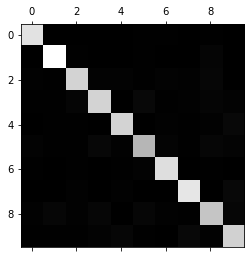

In [25]:
#오차행렬 시각화
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

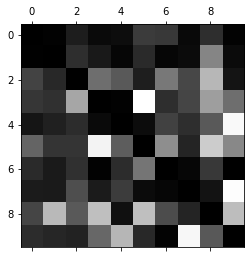

In [26]:
# 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율 비교
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0) # 주대각선만 0으로 채우기
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#### 다중 레이블 분류
분류기가 샘플마다 여러개의 클래스를 출력해야 할 때 (예를 들면 얼굴 인식 분류기, 같은 사진에 여러 명 등장)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd] #np.c_ : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [28]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
# 다중 레이블 분류기를 평가하는 방법은 다양하다.
# 예를 들어 각 레이블의 F1 점수를 구하고 간단하게 평균 점수를 계산한다
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1) #n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용
f1_score(y_multilabel, y_train_knn_pred, average="macro")

#### 다중 출력 분류
다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것

In [ ]:
# 이미지에서 노이즈 제거하는 시스템
# 노이즈가 많은 숫자 이미지 입력받고, 깨끗한 숫자 이미지의 픽셀 배열 출력
# 분류기의 출력이 다중 레이블(픽셀당 한 레이블)이고, 각 레이블은 여러 개의 값을 가진다(0~255) 그러므로 이 예는 다중 출력 분류 시스템

noise = rnd.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0,100, (len(X_train), 784))
X_test_mod = X_test + noise

y_train_mod=X_train
y_test_mod=X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)